<a href="https://colab.research.google.com/github/mudita11/Covid-visual/blob/main/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import psycopg2
import pandas as pd
import datetime
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19')
cur = conn.cursor()

In [3]:
sql_command = """SELECT * FROM epidemiology WHERE source = 'USA_NYT' ORDER by date DESC"""
df_epidemiology = pd.read_sql(sql_command, conn)#, params={'source': 'USA_CTP'})
df_epidemiology.head(10)
df_epidemiology.shape

(1846084, 15)

In [5]:
print(df_epidemiology['adm_area_1'].nunique())
print(df_epidemiology['adm_area_1'].unique())

56
['Iowa' 'Kansas' 'Mississippi' 'Minnesota' 'Michigan' 'Maine' 'Louisiana'
 'Kentucky' 'Montana' 'Missouri' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Puerto Rico' 'South Dakota' 'Tennessee' 'Texas'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'Virgin Islands' 'Georgia' 'Idaho' 'Indiana' 'Florida' 'Delaware'
 'Connecticut' 'Colorado' 'California' 'Arkansas' 'Arizona' 'Alaska'
 'Alabama' 'Illinois' 'Hawaii' 'Utah' 'Vermont' 'Rhode Island'
 'South Carolina' 'New Jersey' 'Northern Mariana Islands' 'Massachusetts'
 'Maryland' 'American Samoa' 'District of Columbia' 'Guam']


In [6]:
sql_command = """SELECT * FROM epidemiology WHERE source = 'USA_NYT' and adm_area_1 = 'Texas'"""
df_epidemiology_texas = pd.read_sql(sql_command, conn)#, params={'source': 'USA_CTP'})
print(df_epidemiology_texas.shape)
df_epidemiology_texas.head()

(141279, 15)


,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,tested,confirmed,recovered,dead,hospitalised,hospitalised_icu,quarantined,gid
0,USA_NYT,2021-07-04,United States,USA,Texas,Tarrant,None,None,263690,None,3577,None,None,None,[USA.44.220_1]
1,USA_NYT,2021-07-04,United States,USA,Texas,Taylor,None,None,16047,None,416,None,None,None,[USA.44.221_1]
2,USA_NYT,2021-07-04,United States,USA,Texas,Terry,None,None,1702,None,57,None,None,None,[USA.44.223_1]
3,USA_NYT,2021-07-04,United States,USA,Texas,Throckmorton,None,None,73,None,5,None,None,None,[USA.44.224_1]
4,USA_NYT,2021-07-04,United States,USA,Texas,Titus,None,None,4229,None,84,None,None,None,[USA.44.225_1]


In [7]:
print(df_epidemiology_texas.columns)
print(df_epidemiology_texas['date'].nunique())
df_epidemiology_texas['date'].unique()[:10]

Index(['source', 'date', 'country', 'countrycode', 'adm_area_1', 'adm_area_2',
       'adm_area_3', 'tested', 'confirmed', 'recovered', 'dead',
       'hospitalised', 'hospitalised_icu', 'quarantined', 'gid'],
      dtype='object')
614


array([datetime.date(2021, 7, 4), datetime.date(2021, 4, 23),
       datetime.date(2021, 4, 1), datetime.date(2021, 3, 29),
       datetime.date(2021, 3, 4), datetime.date(2021, 4, 24),
       datetime.date(2021, 6, 14), datetime.date(2021, 4, 25),
       datetime.date(2020, 5, 18), datetime.date(2020, 6, 17)],
      dtype=object)

In [8]:
start_date = datetime.date(year=2020,  month=3,  day=1)
df_epidemiology_before = df_epidemiology_texas[df_epidemiology_texas['date'] < start_date]

In [9]:
df_epidemiology_before.shape

(36, 15)

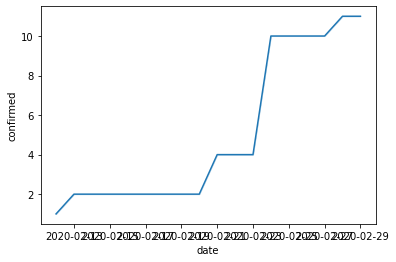

In [10]:
sns.lineplot(data=df_epidemiology_before, x="date", y="confirmed")

In [11]:
df_epidemiology_after = df_epidemiology_texas[df_epidemiology_texas['date'] >= start_date]

In [12]:
df_epidemiology_after.shape

(141243, 15)

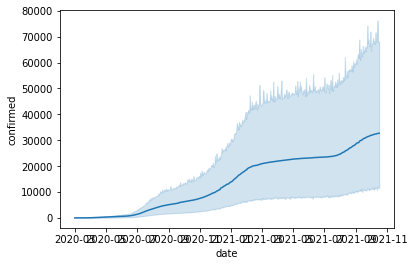

In [13]:
sns.lineplot(data=df_epidemiology_after, x="date", y="confirmed")